# Visual Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
titanic = sns.load_dataset('titanic')

## Getting to know our dataset

To get to know our data, let's look at the first 5 entries using `head()`.

In [3]:
titanic.sex = titanic.sex.replace({'male': 'Male', 'female': 'Female'})
titanic.survived = titanic.survived.replace({ 0: False, 1: True })
titanic.alive = titanic.alive.map({ 'no': False, 'yes': True})
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,3,Male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,False
1,True,1,Female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,True,False
2,True,3,Female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,True
3,True,1,Female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,True,False
4,False,3,Male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,False,True


- survived and alive: 
  - if the passenger survived or not
  - [True, False]
- pclass and class:
  - corresponds to the passenger accommodation class
  - [1, 2, 3]
- sex: 
  - sex of the passenger
  - [Male, Female]
- age: 
  - age of the passenger
  - continuous
- sibsp: 
  - siblings/spouses on board
  - [0, 1, 2, 3, 4, 5, 8]
- parch: 
  - number of parents/children on board
  - [0, 1, 2, 3, 4, 5, 6]  
- fare: 
  - passenger fare
  - continuous
- embarked and embark town: 
  - port of embarkation
  - [S, C, Q, nan] and [Southampton, Cherbourg, Queenstown, nan] respectively
- who: 
  - passenger classification
  - [man, woman, child]
- adult male: 
  - [True, False]
- deck:
  - cabin number
  - [A, B, C, D, E, F, G]
- alone:
  - if the passenger does not have any companions aboard the titanic
  - [True, False

## Univariate Visualization

Univariate analysis looks at one feature at a time without taking into account other features. This is often done when we want to know the distribution of its values.

### Quantitative Features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers and usually express a count or a measurement.

#### Histograms and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c40ea01f0>,
      dtype=object)

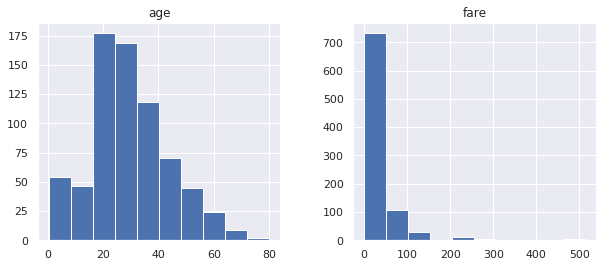

In [4]:
titanic[['fare', 'age']].hist(figsize=(10, 4))

Histograms work by grouping values into bins of equal value range. Oftentimes, it is used to see if there are underlying clues as to what the distribution type is: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. The figures above shows that both age and fare are skewed to the right. 

Another way to grasp the distribution is by using density plots. Suppose we want to know the distribution for the number of parents or children onboard for each passengers.

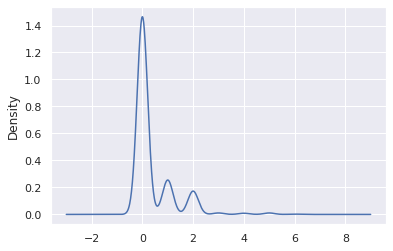

In [5]:
titanic.parch.plot(kind='density')

It is possible to plot a disitribution of observations with seaborn's distplot. This shows a histogram overlayed with a kernel density estimate.

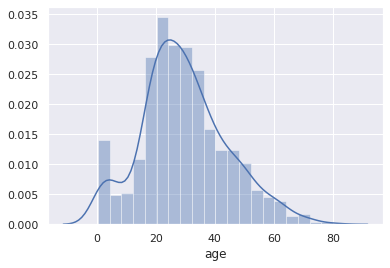

In [6]:
sns.distplot(titanic.age)

The height of the histogram bars here is normalized and shows the density rather than the number of rows in each bin.

### Qualitative Features

Categorical features take on a fixed number of values like embarked town, the passenger cabin number, and so on. Binary values are values like True or False, Male or Female. If the values of a categorical variable are ordered, it is called ordinal. Like for instance, the passenger cabin number: A, B, C, D, E, F, and G. Although they represent categories, they are ordered alphabetically.

####  Frequency Table

A frequency table shows how frequent each value of the categorical variable occurs. For this, we can use the `value_counts()` method.

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null bool
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null bool
alone          891 non-null bool
dtypes: bool(4), category(2), float64(2), int64(3), object(4)
memory usage: 68.5+ KB


In [8]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

By default, values are sorted from the most frequent to the least. This case, it shows that the most frequent embark town was Southampton with 644 passengers. It also shows that the dataset is not balanced and the embark towns are not represented equally. 

Let's take another look at the passenger accommodations. What were the counts for each?

In [9]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

#### Bar Plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use seaborn's function `countplot()`. There is another function in seaborn that is somewhat confusingly called `barplot()` and is most likely used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

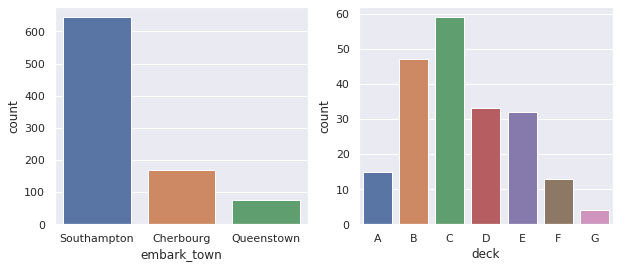

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='embark_town', data=titanic, ax=ax[0])
sns.countplot(x='deck', data=titanic, ax=ax[1])
plt.show()

Although histograms and bar plots look very similar, there are key differences between them:

1. Histograms are suited to show the distribution of quantitative data while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical while a bar plot can have any type of value: numbers, strings, or categorical features
3. Histograms X-axis is a cartesian coordinate axis along which values cannot be changed. The ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider the ordinal values like in the case for deck, they are usually ordered by values.



## Multivariate Visualization

Like univariate plotting, the specific type of visualization is dependent on the type of variable being analyzed.

### Quantitative vs Quantitative

#### Correlation Matrix

Let's look at the correlations among the numerical variables in our dataset. Let's first look at the DataFrame `corr()` method that calculates the correlation beteween each pair of features. Then we pass the resulting correlation matrix to a `heatmap()` from seaborn.

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null bool
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null bool
alone          891 non-null bool
dtypes: bool(4), category(2), float64(2), int64(3), object(4)
memory usage: 68.5+ KB


In [34]:
numerical_variables = ['sibsp', 'parch', 'fare', 'pclass', 'age']

In [35]:
titanic_correlation = titanic[numerical_variables].corr()

In [36]:
titanic_correlation

,sibsp,parch,fare,pclass,age
sibsp,1.000000,0.414838,0.159651,0.083081,-0.308247
parch,0.414838,1.000000,0.216225,0.018443,-0.189119
fare,0.159651,0.216225,1.000000,-0.549500,0.096067
pclass,0.083081,0.018443,-0.549500,1.000000,-0.369226
age,-0.308247,-0.189119,0.096067,-0.369226,1.000000


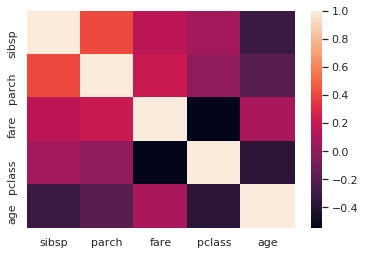

In [37]:
sns.heatmap(titanic_correlation)

#### Scatter Plot

The scatter plot displays 2 numerical variables as cartesian coordinates in 2D space.

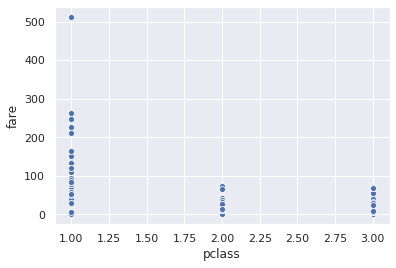

In [30]:
sns.scatterplot(titanic.pclass, titanic.fare)

Using jointplot, we can see additional plots for the histograms of each variable

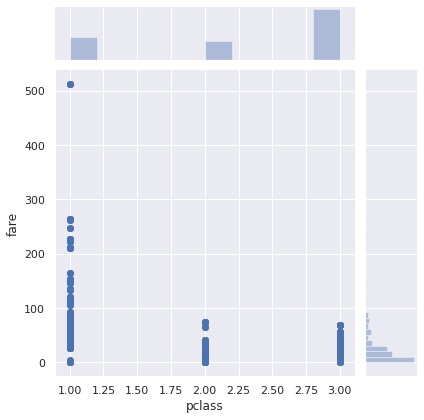

In [33]:
sns.jointplot(titanic.pclass, titanic.fare, kind='scatter')

Using the same function, we can create a smoothed out version of our bivariate distribution

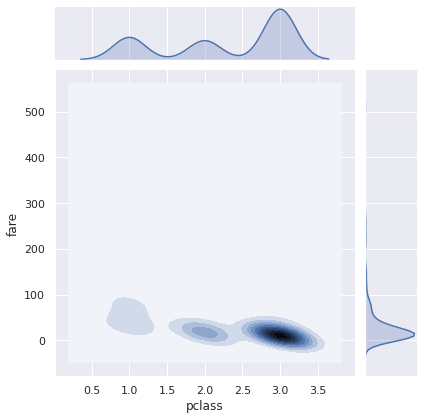

In [31]:
sns.jointplot(titanic.pclass, titanic.fare, kind='kde')

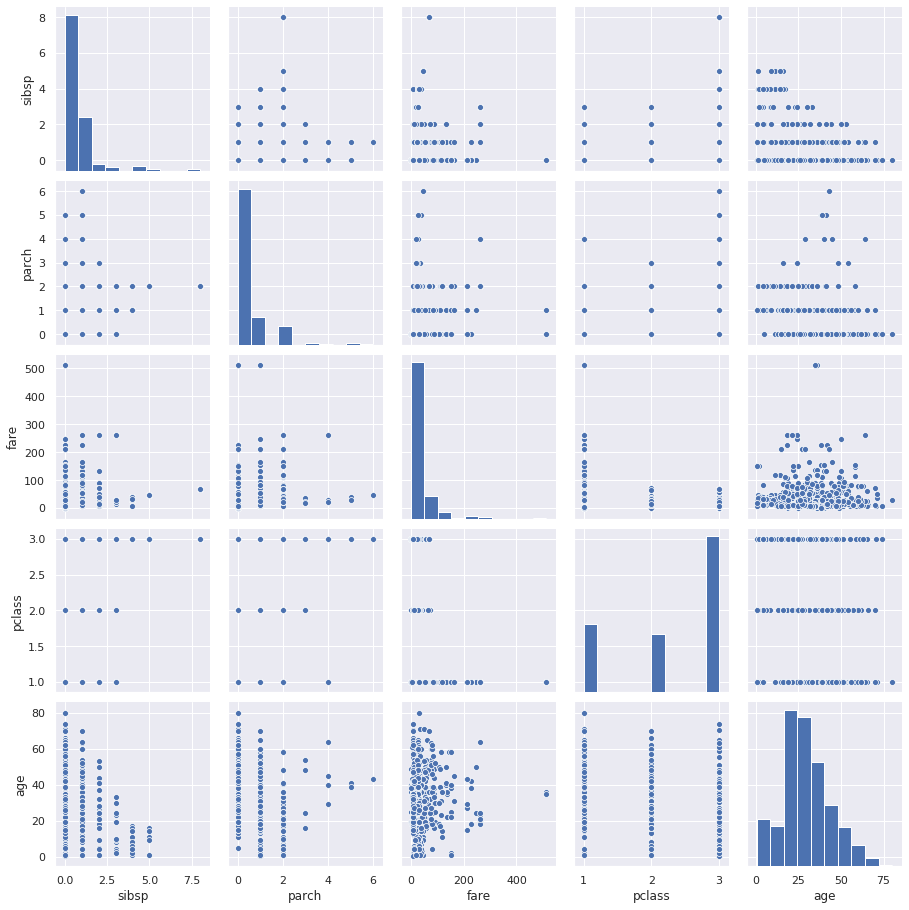

In [39]:
sns.pairplot(titanic[numerical_variables])

The result is a scatterplot matrix. Its diagonal contains the disitributions of the corresponding variables and the scatter pllots for eeach pair of variables fill the rest of the matrix.

### Quantitative vs Categorical

There are cases however when we want to compare numerical variables with categorical ones. Previously we learned about `scatter()` but we can throw in a categorical feature of interest. For this we can use `lmplot()`

### LMPlot

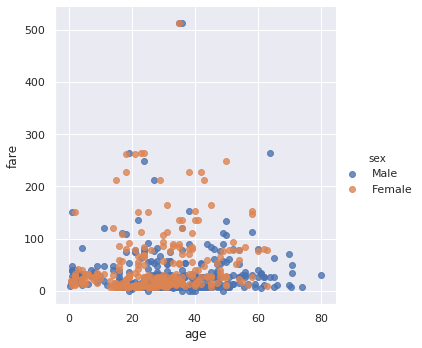

In [45]:
sns.lmplot('age', 'fare', data=titanic, hue='sex', fit_reg=False)

### Box Plot

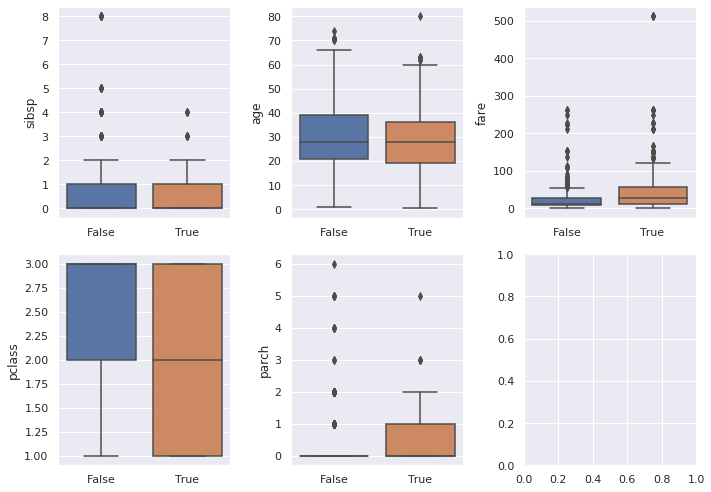

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for idx, feat in enumerate(numerical_variables):
    ax = axes[idx%2, idx%3]
    sns.boxplot(x='survived', y=feat, data=titanic, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
    
fig.tight_layout();

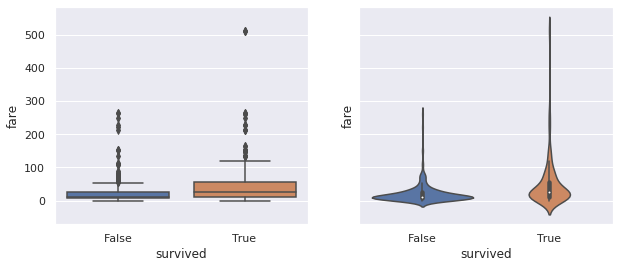

In [60]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='survived', y='fare', data=titanic, ax=axes[0]);
sns.violinplot(x='survived', y='fare', data=titanic, ax=axes[1]);

In this case, the violinplot does not contribute any additional dataas everything is clear from the box plot.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot(). For example, let's visualize the interaction between fare and two categorical variables in the same plot:

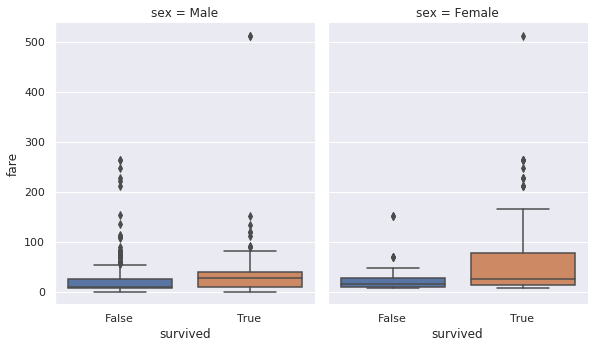

In [90]:
sns.catplot(x='survived', y='fare', col='sex',
            data=titanic[titanic.sex.isin(['Male', 'Female'])], 
            kind="box",
            col_wrap=4, 
            height=5, 
            aspect=.8);

## Categorical vs Categorical

### Bar Plot

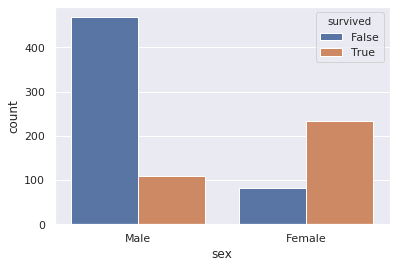

In [98]:
sns.countplot(x='sex', hue='survived', data=titanic)

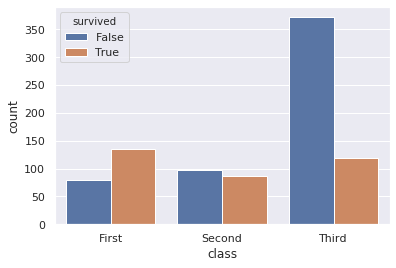

In [100]:
sns.countplot(x='class', hue='survived', data=titanic)